In [83]:
import numpy as np
import matplotlib.pyplot as plt
import firtez_dz as frz
from astropy.io import fits
import scipy
from tqdm import tqdm
import MilneEddington as ME

In [2]:
plt.rc('text', usetex = False)

This part is mainly about the influence by spectral resolution.

## define Gaussian function, use this as the line spread function(LSF).

In [3]:
def Gaussian(sig,x):
    G = np.exp(-x**2/(2*sig**2))/(sig*np.sqrt(2*np.pi))
    return G

In [4]:
x_value = np.linspace(-20,20,41)

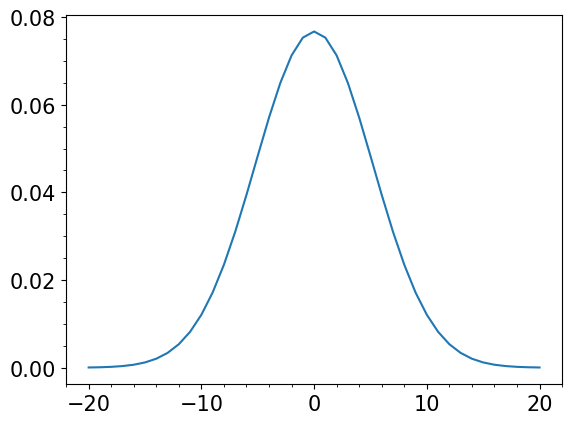

In [5]:
plt.plot(x_value,Gaussian(5.2,x_value))

In [8]:
np.sum(Gaussian(2.6,x_value))

0.9999999999999978

### The recorded spectrum is related to the convolution of original spectrum and the LSF. 
$I(\lambda) = I_0(\lambda) \star LSF(\lambda)$ \
spectral resolution(spectral resolving power) $R = \frac{\lambda}{\delta\lambda}$ \
$\delta\lambda = FWHM = 2 \sqrt{2\ln2} \sigma$

In [6]:
stokes = fits.open('/dat-old/xenosh/Full_simulation/stokes_full.fits')[0].data

In [7]:
stokes.shape

(4096, 4096, 4, 302)

In [8]:
stokes = stokes[:,:,:,:101]

In [9]:
ll = 6173.3354 - 0.5 + np.arange(101) * 10 / 1000

In [497]:
lsf = Gaussian(5,x_value)

convolve LSF.

In [498]:
stokes_degraded_sig5 = np.zeros(stokes.shape)
for i in tqdm(range(stokes.shape[0])):
        for j in range(stokes.shape[1]):
            for k in range(stokes.shape[2]):
                stokes_degraded_sig5[i,j,k,:] = scipy.ndimage.convolve(stokes[i,j,k,:], lsf, mode='nearest')



100%|███████████████████████████████████████| 4096/4096 [26:48<00:00,  2.55it/s]


In [28]:
hdu = fits.PrimaryHDU(stokes_degraded)
hdu.writeto('/dat-old/xenosh/Full_simulation/stokes_degraded_sig5.fits', overwrite=True)

In [11]:
stokes_degraded = fits.open('/dat-old/xenosh/Full_simulation/stokes_degraded.fits')[0].data

In [12]:
stokes_degraded.shape

(4096, 4096, 4, 101)

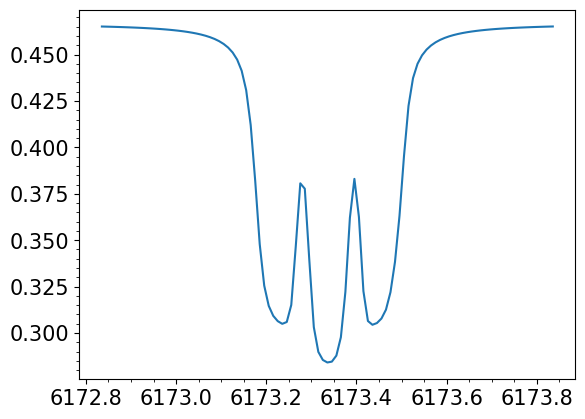

In [61]:
plt.plot(ll,stokes[2000,1200,0,:])

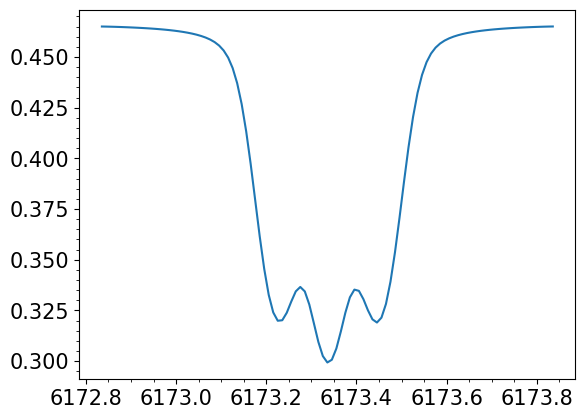

In [12]:
plt.plot(ll,stokes_degraded[2000,1200,0,:])

select six points. 36,43,50,57,64,90   5 around line + 1 in the continuum\
-172,-103,-34,34,103,172mA; points(33,40,47,54,61,68)/range(30-37-44-51-58-65-72)

In [15]:
stokesd = np.zeros((4096,4096,4,6))
for i in tqdm(range(stokes_degraded.shape[0])):
        for j in range(stokes_degraded.shape[1]):
            for k in range(stokes_degraded.shape[2]):
                stokesd[i,j,k,0] = np.sum(stokes_degraded[i,j,k,33:40])/7.0
                stokesd[i,j,k,1] = np.sum(stokes_degraded[i,j,k,40:47])/7.0
                stokesd[i,j,k,2] = np.sum(stokes_degraded[i,j,k,47:54])/7.0
                stokesd[i,j,k,3] = np.sum(stokes_degraded[i,j,k,54:61])/7.0
                stokesd[i,j,k,4] = np.sum(stokes_degraded[i,j,k,61:68])/7.0
                stokesd[i,j,k,5] = np.sum(stokes_degraded[i,j,k,87:94])/7.0

100%|███████████████████████████████████████| 4096/4096 [25:46<00:00,  2.65it/s]


In [68]:
stokesd1 = np.zeros((4096,4096,4,6))
for i in tqdm(range(stokes_degraded.shape[0])):
        for j in range(stokes_degraded.shape[1]):
            for k in range(stokes_degraded.shape[2]):
                stokesd1[i,j,k,0] = stokes_degraded[i,j,k,36]
                stokesd1[i,j,k,1] = stokes_degraded[i,j,k,43]
                stokesd1[i,j,k,2] = stokes_degraded[i,j,k,50]
                stokesd1[i,j,k,3] = stokes_degraded[i,j,k,57]
                stokesd1[i,j,k,4] = stokes_degraded[i,j,k,64]
                stokesd1[i,j,k,5] = stokes_degraded[i,j,k,90]

100%|███████████████████████████████████████| 4096/4096 [08:13<00:00,  8.30it/s]


In [99]:
stokesd2 = np.zeros((4096,4096,4,6))
for i in tqdm(range(stokes_degraded.shape[0])):
        for j in range(stokes_degraded.shape[1]):
            for k in range(stokes_degraded.shape[2]):
                stokesd2[i,j,k,0] = stokes_degraded[i,j,k,33]
                stokesd2[i,j,k,1] = stokes_degraded[i,j,k,40]
                stokesd2[i,j,k,2] = stokes_degraded[i,j,k,47]
                stokesd2[i,j,k,3] = stokes_degraded[i,j,k,54]
                stokesd2[i,j,k,4] = stokes_degraded[i,j,k,61]
                stokesd2[i,j,k,5] = stokes_degraded[i,j,k,68]

100%|███████████████████████████████████████| 4096/4096 [20:30<00:00,  3.33it/s]


In [415]:
stokesd3 = np.zeros((4096,4096,4,6))
for i in tqdm(range(stokes_degraded.shape[0])):
        for j in range(stokes_degraded.shape[1]):
            for k in range(stokes_degraded.shape[2]):
                stokesd3[i,j,k,0] = np.sum(stokes_degraded[i,j,k,30:37])/7.0
                stokesd3[i,j,k,1] = np.sum(stokes_degraded[i,j,k,37:44])/7.0
                stokesd3[i,j,k,2] = np.sum(stokes_degraded[i,j,k,44:51])/7.0
                stokesd3[i,j,k,3] = np.sum(stokes_degraded[i,j,k,51:58])/7.0
                stokesd3[i,j,k,4] = np.sum(stokes_degraded[i,j,k,58:65])/7.0
                stokesd3[i,j,k,5] = np.sum(stokes_degraded[i,j,k,65:72])/7.0

100%|███████████████████████████████████████| 4096/4096 [35:49<00:00,  1.91it/s]


In [416]:
hdu = fits.PrimaryHDU(stokesd3)
hdu.writeto('/dat-old/xenosh/Full_simulation/stokesd_HMIlike_avg.fits', overwrite=True)

In [18]:
stokesd = fits.open('/dat-old/xenosh/Full_simulation/stokesd_points.fits')[0].data

In [17]:
np.sum(stokes_degraded[0,0,0,33:40])/7.0

0.8849999110859151

In [19]:
stokesd.shape

(4096, 4096, 4, 6)

In [ ]:
x = [0,1,2,3,4,5]

a view of the degraded line and the selected points

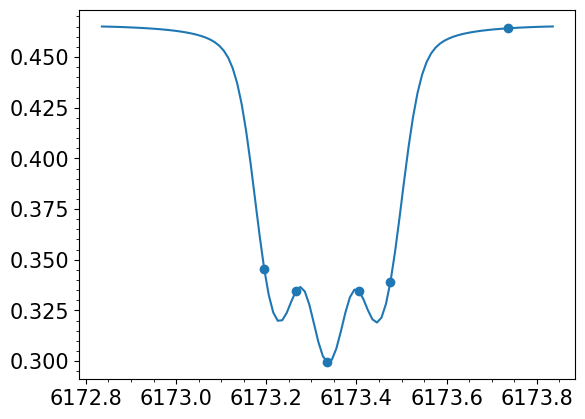

In [69]:
plt.scatter(w,stokesd1[2000,1200,0,:])
plt.plot(ll,stokes_degraded[2000,1200,0,:])

calculate the wavelength for the corresponding points. w for 5+1, w2 for HMI like.

In [94]:
6173.3354 - 0.5 + 40 * 10 / 1000

6173.2354

In [13]:
w = np.array((6173.1954, 6173.2654, 6173.3354, 6173.4054, 6173.4754, 6173.7354))

def findgrid to make a fine grid with a step dw. add extra points at the edges.

In [64]:
# A function that will calculate the nice fine grid for us:
def findgrid(w, dw, extra):
    
    """
    Findgrid creates a regular wavelength grid 
    with a step of dw that includes all points in 
    input array w. It adds extra points at the edges
    for convolution purposes

    Returns the new array and the positions of the
    wavelengths points from w in the new array
    """
    nw = np.int32(np.rint(w/dw)) # number of wavelengths
    nnw = nw[-1] - nw[0] + 1 + 2*extra # new number of wavelengths, including extras
    
    # wavelength grid
    iw = np.arange(nnw, dtype='float64')*dw - extra*dw + w[0]

    # this one is a bit abstract, but actually super useful
    # this one returns the indices of the points that are the closest to the original
    idx = np.arange(w.size, dtype='int32')
    for ii in range(w.size):
        idx[ii] = np.argmin(np.abs(iw-w[ii]))

    return iw, idx

In [34]:
# Refine our grid:
iw, idx = findgrid(w, 0.01,40)

In [35]:
iw2,idx2 = findgrid(w,0.01,30)

In [65]:
iw4,idx4 = findgrid(w2,0.01,30)

In [92]:
iw4

array([6172.8654, 6172.8754, 6172.8854, 6172.8954, 6172.9054, 6172.9154,
       6172.9254, 6172.9354, 6172.9454, 6172.9554, 6172.9654, 6172.9754,
       6172.9854, 6172.9954, 6173.0054, 6173.0154, 6173.0254, 6173.0354,
       6173.0454, 6173.0554, 6173.0654, 6173.0754, 6173.0854, 6173.0954,
       6173.1054, 6173.1154, 6173.1254, 6173.1354, 6173.1454, 6173.1554,
       6173.1654, 6173.1754, 6173.1854, 6173.1954, 6173.2054, 6173.2154,
       6173.2254, 6173.2354, 6173.2454, 6173.2554, 6173.2654, 6173.2754,
       6173.2854, 6173.2954, 6173.3054, 6173.3154, 6173.3254, 6173.3354,
       6173.3454, 6173.3554, 6173.3654, 6173.3754, 6173.3854, 6173.3954,
       6173.4054, 6173.4154, 6173.4254, 6173.4354, 6173.4454, 6173.4554,
       6173.4654, 6173.4754, 6173.4854, 6173.4954, 6173.5054, 6173.5154,
       6173.5254, 6173.5354, 6173.5454, 6173.5554, 6173.5654, 6173.5754,
       6173.5854, 6173.5954, 6173.6054, 6173.6154, 6173.6254, 6173.6354,
       6173.6454, 6173.6554, 6173.6654, 6173.6754, 

In [57]:
ll

array([6172.8354, 6172.8454, 6172.8554, 6172.8654, 6172.8754, 6172.8854,
       6172.8954, 6172.9054, 6172.9154, 6172.9254, 6172.9354, 6172.9454,
       6172.9554, 6172.9654, 6172.9754, 6172.9854, 6172.9954, 6173.0054,
       6173.0154, 6173.0254, 6173.0354, 6173.0454, 6173.0554, 6173.0654,
       6173.0754, 6173.0854, 6173.0954, 6173.1054, 6173.1154, 6173.1254,
       6173.1354, 6173.1454, 6173.1554, 6173.1654, 6173.1754, 6173.1854,
       6173.1954, 6173.2054, 6173.2154, 6173.2254, 6173.2354, 6173.2454,
       6173.2554, 6173.2654, 6173.2754, 6173.2854, 6173.2954, 6173.3054,
       6173.3154, 6173.3254, 6173.3354, 6173.3454, 6173.3554, 6173.3654,
       6173.3754, 6173.3854, 6173.3954, 6173.4054, 6173.4154, 6173.4254,
       6173.4354, 6173.4454, 6173.4554, 6173.4654, 6173.4754, 6173.4854,
       6173.4954, 6173.5054, 6173.5154, 6173.5254, 6173.5354, 6173.5454,
       6173.5554, 6173.5654, 6173.5754, 6173.5854, 6173.5954, 6173.6054,
       6173.6154, 6173.6254, 6173.6354, 6173.6454, 

In [15]:
idx

array([40, 47, 54, 61, 68, 94], dtype=int32)

put original stokes in 

In [538]:
nx,ny = stokesd4.shape[0:2]
i = 0
j = 0

to_fit = np.zeros((nx,ny,4,iw6.size), dtype='float64', order='c') 

# This puts the original stokes values in the appropriate spots in to_fit array:
for s in range(4):
    for l in range(idx6.size):
        to_fit[:,:,s,idx6[l]] = stokesd4[:,:,s,l]


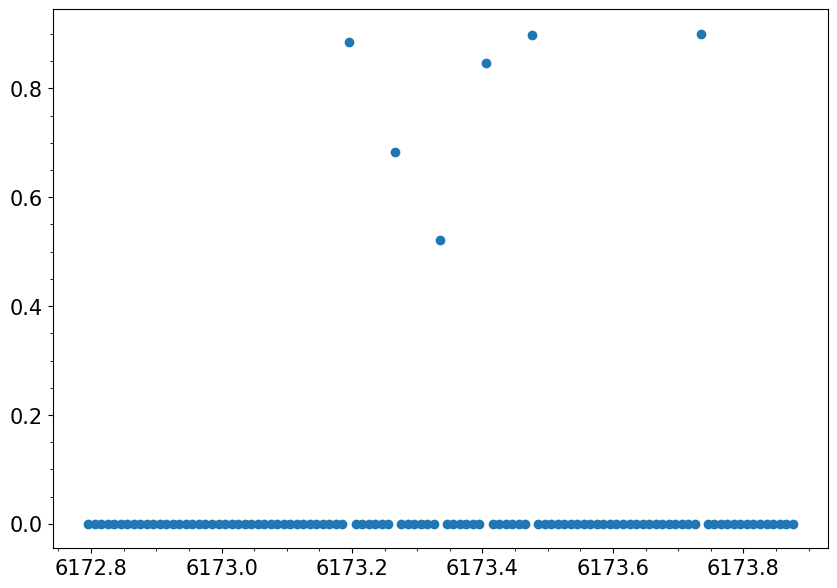

In [21]:
plt.figure(figsize=[10,7])
plt.plot(iw,to_fit[0,0,0],'o')

add huge noise to give them zero weight

In [543]:
noise= np.zeros((4,iw6.size), dtype='float64') + 1.e34 # Huge noise everywhere
noise[:,idx6] = 3.e-3 # except in the points we want to fit! 

noise[1:3, idx6] /= 10
noise[3, idx6] /= 3.5

inversion. add lsf in regions

In [544]:
%%time

regions = [[iw6,filters[3,7700:8300:10]/np.sum(filters[3,7500:8500:10])]]

lines = [6173]
me = ME.MilneEddington(regions, lines, nthreads=180)

# guess model
guess_model = np.float64([500, 2.2, 1.0, -0.5, 0.035, 50., 0.1, 0.24, 0.7])
guess_models = me.repeat_model(guess_model, nx, ny)

model_out, syn, chi2 = me.invert(guess_models, to_fit, noise, nRandom=5, nIter=25, chi2_thres=1.0)

pyMilne::dealloc: cleaning-up...


line::line: Initialized [6173.334000] ->   3 Zeeman components
InvertMany: Processed ->  66%

CPU times: user 2d 13h 47min 4s, sys: 34 s, total: 2d 13h 47min 38s
Wall time: 20min 51s


InvertMany: Processed -> 100%


smooth the model then invert again. give better initial guess.

In [547]:
from scipy.ndimage import gaussian_filter
model_smoothened = gaussian_filter(model_out,(2,2,0))
model_out, syn, chi2 = me.invert(model_smoothened, to_fit, noise, nRandom=5, nIter=25, chi2_thres=1.0)

InvertMany: Processed -> 100%


In [550]:
hdu1 = fits.PrimaryHDU(model_out)
hdu2 = fits.ImageHDU(syn)
hdulist = fits.HDUList([hdu1,hdu2])
hdulist.writeto('/dat-old/xenosh/Full_simulation/stokesd_f3_inverted_smooth_ex20.fits', overwrite=True)

chi2 map 

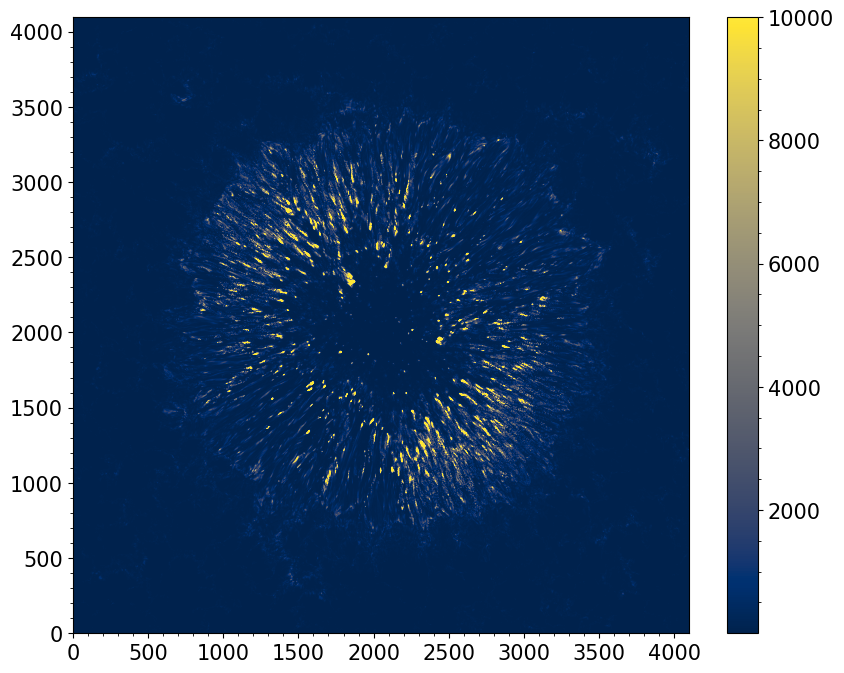

In [353]:
plt.figure(figsize=[10,8])
plt.imshow(chi2,origin='lower',cmap='cividis',vmax=10000)
plt.colorbar()

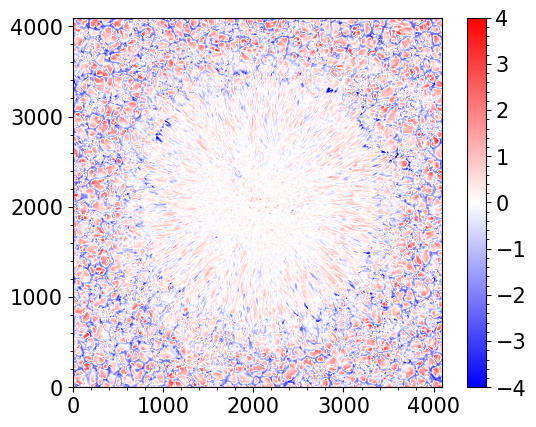

In [257]:
plt.imshow(model_out[:,:,3],origin='lower',cmap='bwr',vmin=-4,vmax=4)
plt.colorbar()

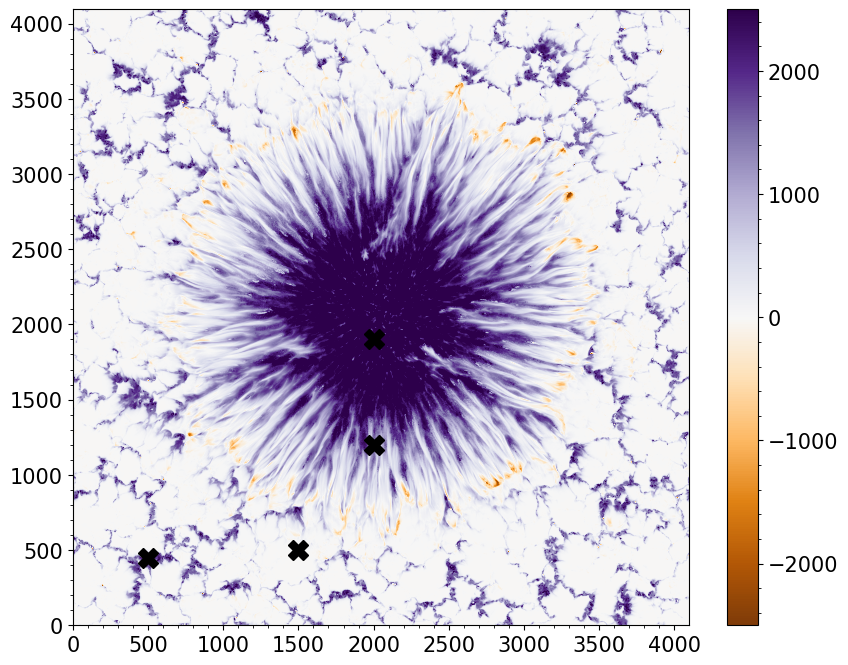

In [192]:
plt.figure(figsize=[10,8])
plt.imshow(Bz.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()
plt.plot(500,450,marker='X',markersize=14, color="black")
plt.plot(1500,500,marker='X',markersize=14, color="black")
plt.plot(2000,1200,marker='X',markersize=14, color="black")
plt.plot(2000,1900,marker='X',markersize=14, color="black")

In [201]:
print('<Bz>simul',np.mean(bz))
print('<|Bz|>simul',np.mean(np.abs(bz)))

<Bz>simul 548.1751137776333
<|Bz|>simul 569.8796958662862


In [30]:
print(np.mean(Bz))
print(np.mean(np.abs(Bz)))

562.3050962170826
592.3261180413799


In [151]:
print('<Bz>',np.mean(Bz2))
print('<|Bz|>',np.mean(np.abs(Bz2)))

<Bz> 551.8790761803651
<|Bz|> 576.9381894981904


In [175]:
print('<Bz>',np.mean(Bz3))
print('<|Bz|>',np.mean(np.abs(Bz3)))

<Bz> 498.2745935189054
<|Bz|> 572.9896557242394


Have a look at the stokes profile to see if they fit well

penumbra

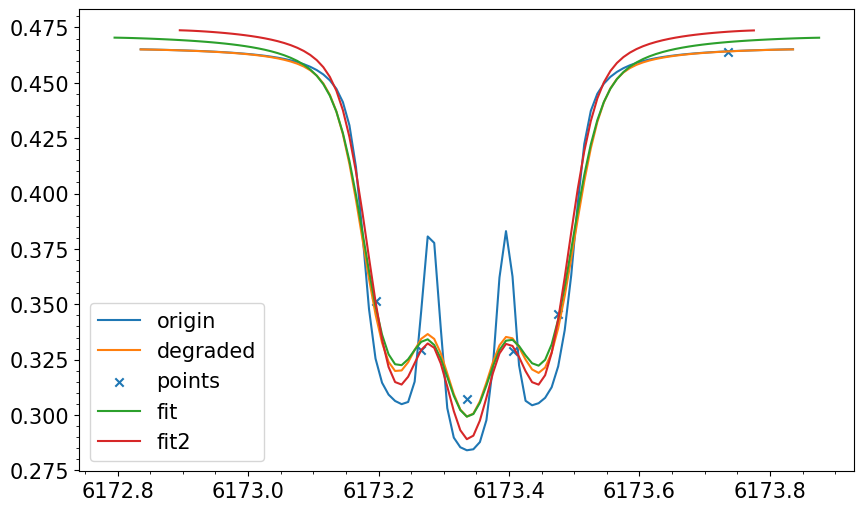

In [88]:
plt.figure(figsize=[10,6])
plt.plot(ll,stokes[2000,1200,0,:101],label="origin")
plt.plot(ll,stokes_degraded[2000,1200,0,:],label="degraded")
plt.scatter(w,stokesd[2000,1200,0,:],marker='x',label="points")
plt.plot(iw,syn[2000,1200,0,:],label="fit")
plt.plot(iw2,syn2[2000,1200,0,:],label="fit2")
plt.legend()

umbra

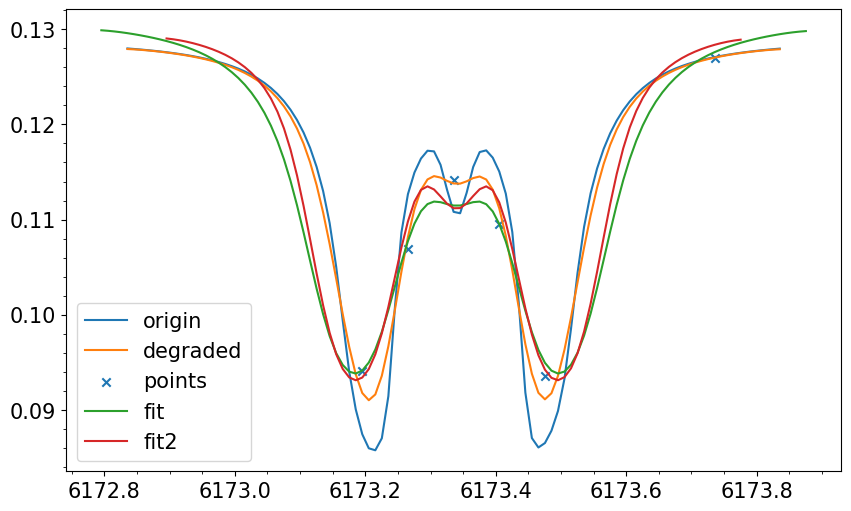

In [86]:
plt.figure(figsize=[10,6])
plt.plot(ll,stokes[2000,1900,0,:101],label="origin")
plt.plot(ll,stokes_degraded[2000,1900,0,:],label="degraded")
plt.scatter(w,stokesd[2000,1900,0,:],marker='x',label="points")
plt.plot(iw,syn[2000,1900,0,:],label="fit")
plt.plot(iw2,syn2[2000,1900,0,:],label="fit2")
plt.legend()

quiet sun

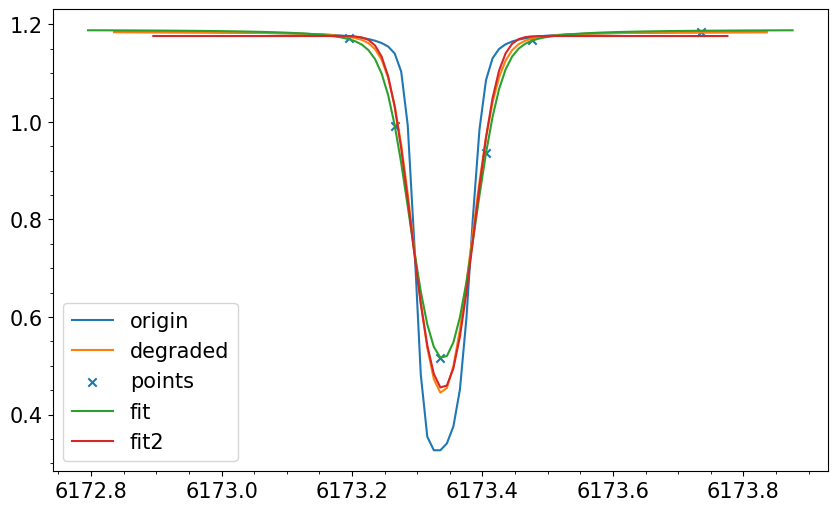

In [85]:
plt.figure(figsize=[10,6])
plt.plot(ll,stokes[1500,500,0,:101],label="origin")
plt.plot(ll,stokes_degraded[1500,500,0,:],label="degraded")
plt.scatter(w,stokesd[1500,500,0,:],marker='x',label="points")
plt.plot(iw,syn[1500,500,0,:],label="fit")
plt.plot(iw2,syn2[1500,500,0,:],label="fit2")
plt.legend()

compare

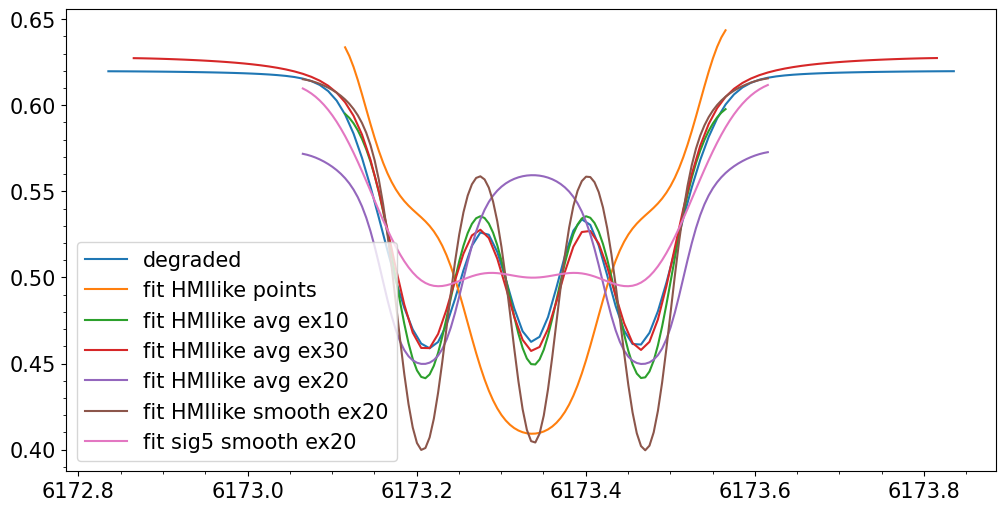

In [471]:
plt.figure(figsize=[12,6])
x = 2201
y = 1056
i = 0
#plt.plot(ll,stokes[x,y,i,:101],label="origin")
#plt.plot(ll[30:71],lsf,label='lsf')
#plt.plot(ll,syns[x,y,i,:],label="simul")
plt.plot(ll,stokes_degraded[x,y,i,:],label="degraded")
#plt.plot(iw,syn[x,y,i,:],label="fit avg")
#plt.plot(iw2,syn2[x,y,i,:],label="fit direct points")
plt.plot(iw3,syn3[x,y,i,:],label="fit HMIlike points")
plt.plot(iw3,syn4[x,y,i,:],label="fit HMIlike avg ex10")
plt.plot(iw4,syn5[x,y,i,:],label="fit HMIlike avg ex30")
plt.plot(iw5,syn6[x,y,i,:],label="fit HMIlike avg ex20")
plt.plot(iw6,syn7[x,y,i,:],label="fit HMIlike smooth ex20")
plt.plot(iw6,syn9[x,y,i,:],label="fit sig5 smooth ex20")
#plt.scatter(w,stokesd[x,y,i,:],marker='x',label="1:points with average",color='black')
#plt.scatter(w,stokesd1[x,y,i,:],marker='o',label="2:points",color='black')
#plt.scatter(w2,stokesd2[x,y,i,:],marker='+',label="points HMI-like",color='black')
plt.legend()

In [381]:
print(bz[x,y])
print(Bz2[x,y])
print(Bz3[x,y])
print(Bz4[x,y])
print(Bz7[x,y])

2958.779124370462
2981.2263097019263
2901.2552840851413
2922.4359571953873
2901.280616032441


In [ ]:
print(bh[x,y])
print(Bh2[x,y])
print(Bh3[x,y])

In [382]:
print(models[x,y,0])
print(model2[x,y,0])
print(model3[x,y,0])
print(model4[x,y,0])
print(model7[x,y,0])

3311.1434439823984
3323.5904763628955
3246.210449106072
3259.585904007177
3246.243057195001


In [ ]:
Bh2 = model2[:,:,0]*np.sin(model2[:,:,1])
Bh3 = model3[:,:,0]*np.sin(model3[:,:,1])

In [ ]:
bh= models[:,:,0]*np.sin(models[:,:,1])
Bh=model[:,:,0]*np.sin(model[:,:,1])

In [16]:
model = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted.fits')[0].data
syn = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted.fits')[1].data

In [28]:
syn2.shape

(4096, 4096, 4, 89)

In [19]:
model2 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_1.fits')[0].data
syn2 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_1.fits')[1].data

In [17]:
Bz = model[:,:,0]*np.cos(model[:,:,1])

In [20]:
Bz2 = model2[:,:,0]*np.cos(model2[:,:,1])

In [21]:
w2 = np.array((6173.1654, 6173.2354, 6173.3054, 6173.3754, 6173.4454, 6173.5154))

In [22]:
iw3, idx3 = findgrid(w2,0.005,10)

In [356]:
iw3

array([6173.1154, 6173.1204, 6173.1254, 6173.1304, 6173.1354, 6173.1404,
       6173.1454, 6173.1504, 6173.1554, 6173.1604, 6173.1654, 6173.1704,
       6173.1754, 6173.1804, 6173.1854, 6173.1904, 6173.1954, 6173.2004,
       6173.2054, 6173.2104, 6173.2154, 6173.2204, 6173.2254, 6173.2304,
       6173.2354, 6173.2404, 6173.2454, 6173.2504, 6173.2554, 6173.2604,
       6173.2654, 6173.2704, 6173.2754, 6173.2804, 6173.2854, 6173.2904,
       6173.2954, 6173.3004, 6173.3054, 6173.3104, 6173.3154, 6173.3204,
       6173.3254, 6173.3304, 6173.3354, 6173.3404, 6173.3454, 6173.3504,
       6173.3554, 6173.3604, 6173.3654, 6173.3704, 6173.3754, 6173.3804,
       6173.3854, 6173.3904, 6173.3954, 6173.4004, 6173.4054, 6173.4104,
       6173.4154, 6173.4204, 6173.4254, 6173.4304, 6173.4354, 6173.4404,
       6173.4454, 6173.4504, 6173.4554, 6173.4604, 6173.4654, 6173.4704,
       6173.4754, 6173.4804, 6173.4854, 6173.4904, 6173.4954, 6173.5004,
       6173.5054, 6173.5104, 6173.5154, 6173.5204, 

In [23]:
model3 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2.fits')[0].data
syn3 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2.fits')[1].data

In [352]:
chi2 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2.fits')[2].data

In [24]:
Bz3 = model3[:,:,0]*np.cos(model3[:,:,1])

In [57]:
models = fits.open('/dat-old/xenosh/Full_simulation/stokes_full_inverted_6173.fits')[0].data
syns = fits.open('/dat-old/xenosh/Full_simulation/stokes_full_inverted_6173.fits')[1].data

In [58]:
bz = models[:,:,0]*np.cos(models[:,:,1])

In [150]:
np.mean(bz)

548.1751137776333

In [149]:
bzz=np.abs(bz)

In [174]:
np.mean(bzz)

569.8796958662862

In [181]:
print(np.mean(np.abs(bz[np.abs(bz)>300])))
print(np.mean(np.abs(Bz[np.abs(Bz)>300])))

1369.011703988552
1447.3934301468405


In [182]:
np.mean(np.abs(Bz3[np.abs(Bz3)>300]))

1372.09361223018

In [186]:
np.mean(bz[np.abs(bz)>300])

1340.391114500808

In [199]:
np.mean(Bz3[Bz3<0])

-140.86061639137563

In [198]:
np.mean(bz[bz<0])

-51.06981119010661

In [222]:
Bz3[Bz3<-300].size

286039

In [223]:
bz[bz<-300].size

145767

In [229]:
Bz[2100,1300]

-206.51625696782162

bz is origin inverted result, Bz is 5+1 points with avg, Bz2 is direct points, Bz3 is HMIlike direct points, Bz4 is HMIlike points with avg, Bz7 is HMIlike direct points smooth, Bz8 is HMIlike avg points smooth, Bz9 is sig5(FWHM x2) HMIlike smooth

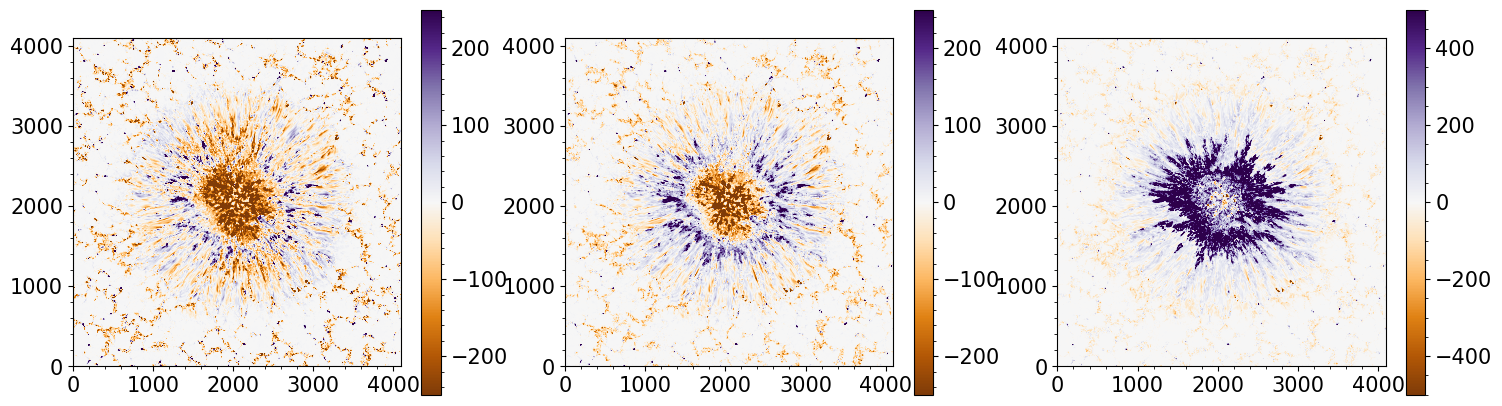

In [373]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.imshow(bz.T-Bz.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()
plt.subplot(132)
plt.imshow(bz.T-Bz2.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()
plt.subplot(133)
plt.imshow(bz.T-Bz3.T,origin ='lower',cmap='PuOr',vmin=-500,vmax=500)
plt.colorbar()

seems it always overestimate the magnetic field around in bz but underestimate in bh

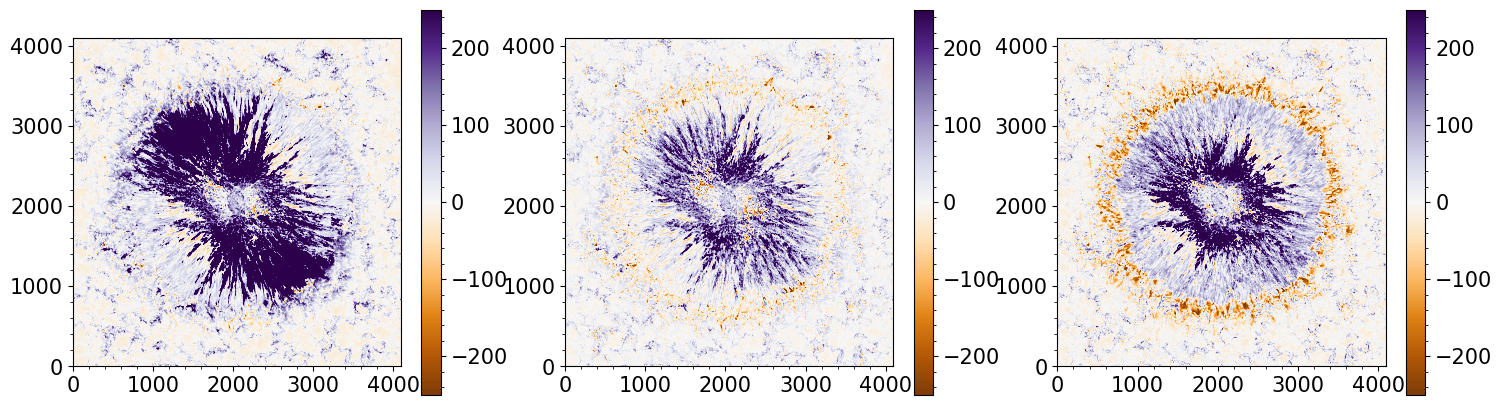

In [322]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.imshow(bh.T-Bh.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()
plt.subplot(132)
plt.imshow(bh.T-Bh2.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()
plt.subplot(133)
plt.imshow(bh.T-Bh3.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()

we can see a significant asymmetry

show a small range of area to see the points which are not fit well

NameError: name 'Bz3' is not defined

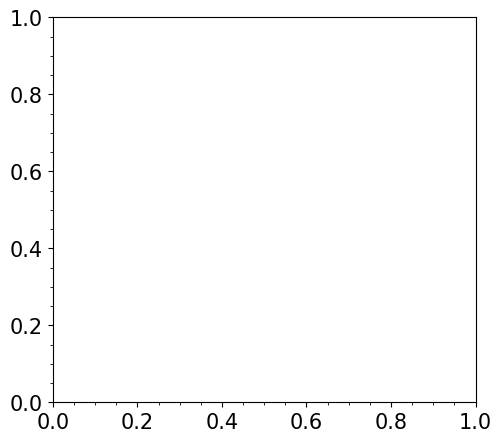

In [84]:
x = 1500
y = 1900
xrange = 50
yrange = 50
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(Bz3[x:x+xrange, y:y+yrange].T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()
plt.subplot(122)
plt.imshow(Bz6[x:x+xrange, y:y+yrange].T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)
#plt.plot(x,y,'o', mfc='none')
plt.colorbar()

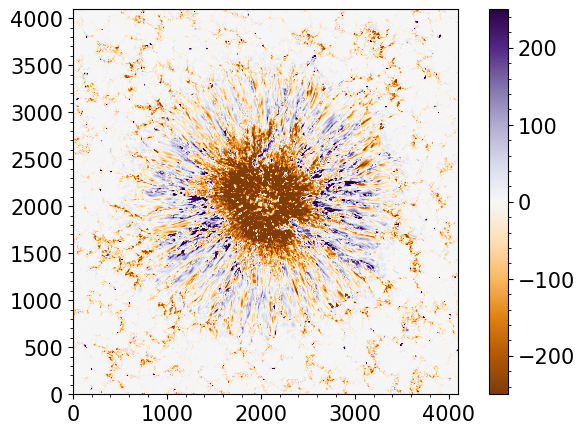

In [230]:
plt.figure(figsize=(8,5))
plt.imshow(bz.T-Bz7.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()

try to plot histogram

In [308]:
diff = bz-Bz3

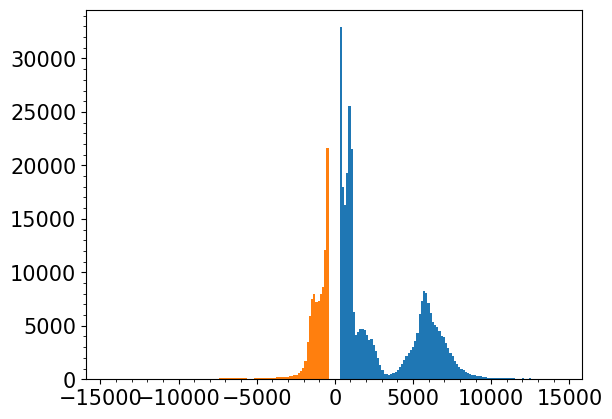

In [311]:
plt.hist(diff[diff>300].flatten(),bins=100)
plt.hist(diff[diff<-400],bins=100)
plt.show()

Here plot histogram of diff larger than 400(G), the peak around 6000 maybe due to 

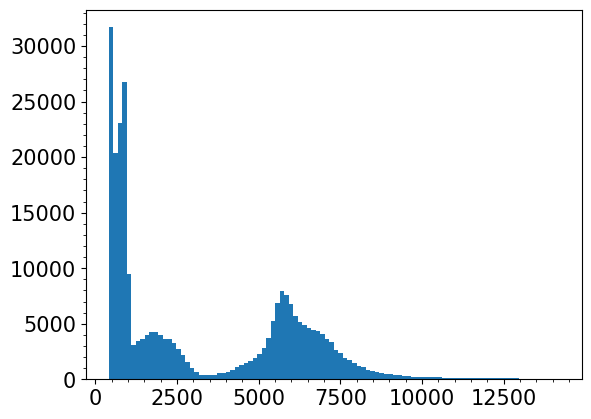

In [168]:
plt.hist(diff[diff>400].flatten(),bins=100)

plt.show()

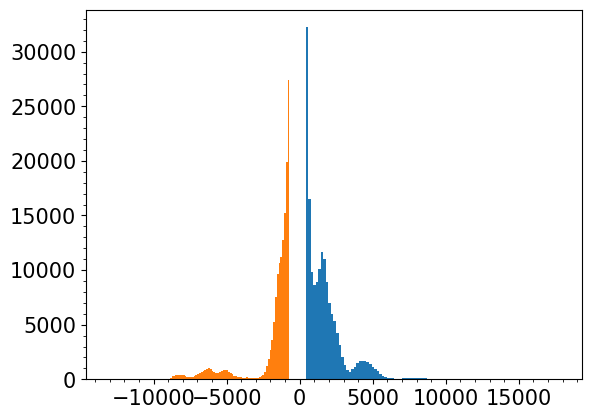

In [271]:
plt.hist(diff[diff>400],bins=100)
plt.hist(diff[diff<-700],bins=100)
plt.show()

In [257]:
diff[diff>1000].size

103068

In [390]:
diff.flatten().shape

(16777216,)

In [399]:
np.max(diff)

14365.885850168379

In [407]:
np.argwhere(diff>13000)

array([[ 518, 1431],
       [1339, 2072],
       [1398, 1748],
       [1400, 2073],
       [1417, 2079],
       [1484,   91],
       [1508, 1743],
       [1527, 1747],
       [1528, 1752],
       [1553, 2208],
       [1554, 2207],
       [1622, 2208],
       [1627, 2203],
       [1647, 2202],
       [1652, 2041],
       [1756, 2483],
       [1760, 2469],
       [1764, 2476],
       [1801, 2356],
       [1873, 2531],
       [1879, 2521],
       [1976, 1624],
       [1985, 1648],
       [1990, 1645],
       [1993, 1587],
       [2255, 1914],
       [2271, 1821],
       [2284, 1806],
       [2286, 1833],
       [2287, 1806],
       [2288, 1804],
       [2303, 1575],
       [2317, 1575],
       [2337, 1948],
       [2366, 1885],
       [2388, 2209],
       [2465, 1829],
       [2491, 1825],
       [2590, 2134],
       [2656, 1914],
       [2665, 1928]])

In [414]:
np.std(bz-Bz3)

561.9743502879904

In [418]:
chi2s = fits.open('/dat-old/xenosh/Full_simulation/stokes_full_inverted_6173.fits')[2].data

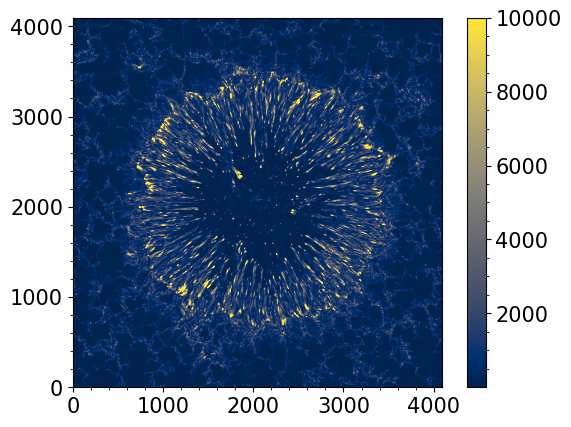

In [419]:
plt.imshow(chi2s,origin='lower',cmap='cividis',vmax=10000)
plt.colorbar()

In [ ]:
np.argwhere(diff>)

In [440]:
diff>15000

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [462]:
chi2 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_smooth.fits')[2].data

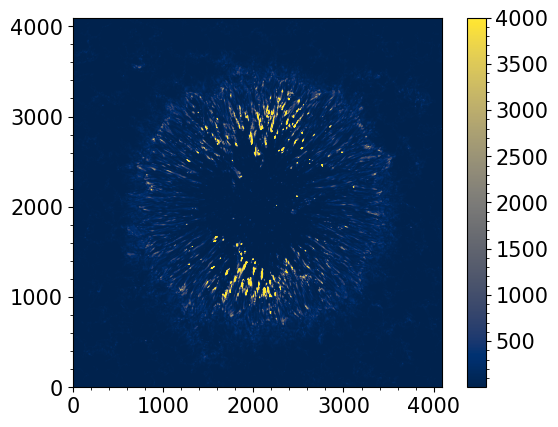

In [549]:
plt.imshow(chi2,origin='lower',cmap='cividis',vmax=4000)
plt.colorbar()

In [464]:
del chi2

In [37]:
model4 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg.fits')[0].data
syn4 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg.fits')[1].data

In [38]:
Bz4 = model4[:,:,0]*np.cos(model4[:,:,1])

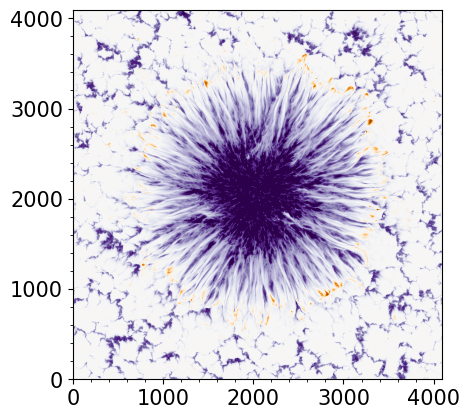

In [447]:
plt.imshow(Bz9.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)

In [55]:
model5 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_ex30.fits')[0].data
syn5 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_ex30.fits')[1].data

In [145]:
model6 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_ex20_0.005.fits')[0].data
syn6 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_ex20_0.005.fits')[1].data

In [331]:
model7 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_smooth.fits')[0].data
syn7 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_smooth.fits')[1].data

In [396]:
model8 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_smooth.fits')[0].data
syn8 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_inverted_2_avg_smooth.fits')[1].data

In [443]:
model9 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_2_sig5_inverted_smooth_ex20.fits')[0].data
syn9 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_2_sig5_inverted_smooth_ex20.fits')[1].data

In [307]:
del model7,syn7,Bz7

In [56]:
Bz5 = model5[:,:,0]*np.cos(model5[:,:,1])

In [146]:
Bz6 = model6[:,:,0]*np.cos(model6[:,:,1])

In [335]:
Bz7 = model7[:,:,0]*np.cos(model7[:,:,1])
Bh7 = model7[:,:,0]*np.sin(model7[:,:,1])

In [397]:
Bz8 = model8[:,:,0]*np.cos(model8[:,:,1])
Bh8 = model8[:,:,0]*np.sin(model8[:,:,1])

In [444]:
Bz9 = model9[:,:,0]*np.cos(model9[:,:,1])
Bh9 = model9[:,:,0]*np.sin(model9[:,:,1])

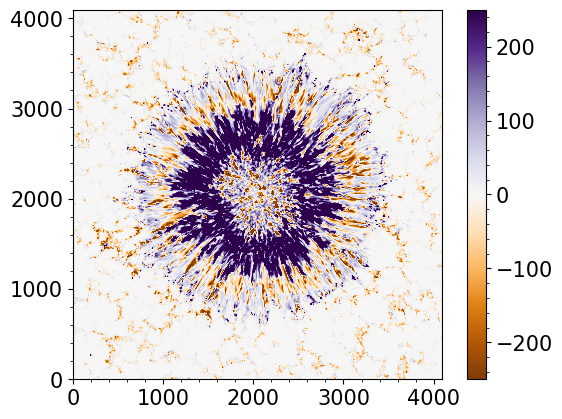

In [445]:
plt.imshow(bz.T-Bz9.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()

In [338]:
np.std(bz-Bz7)

114.50136792358151

In [339]:
np.mean(bz[1600:2400,1600:2400]-Bz7[1600:2400,1600:2400])

-28.875706802369486

In [108]:
iw5,idx5=findgrid(w2,0.005,20)

In [127]:
stokesd2 = fits.open('/dat-old/xenosh/Full_simulation/stokesd_points_2.fits')[0].data

In [341]:
np.mean(Bz6)

494.6992675230783

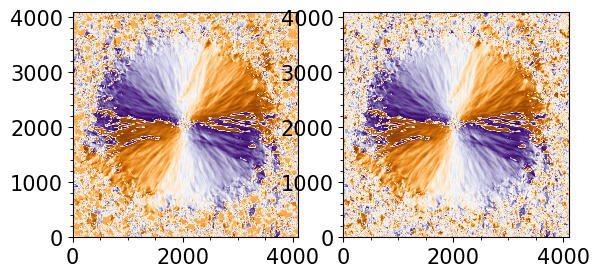

In [391]:
plt.subplot(121)
plt.imshow(model8[:,:,2].T*180./np.pi,origin='lower',cmap='PuOr')
plt.subplot(122)
plt.imshow(models[:,:,2].T*180./np.pi,origin='lower',cmap='PuOr')

In [373]:
iw6,idx6=findgrid(w2,0.005,20)

In [398]:
iw7,idx7=findgrid(w2,0.005,10)

In [448]:
np.mean(Bz9)

512.4275542056686

In [449]:
np.mean(np.abs(Bz9))

537.2175405533259

In [227]:
np.std(bz-Bz)

338.7126553407022

In [392]:
np.std(bz-Bz7)

114.50136792358151

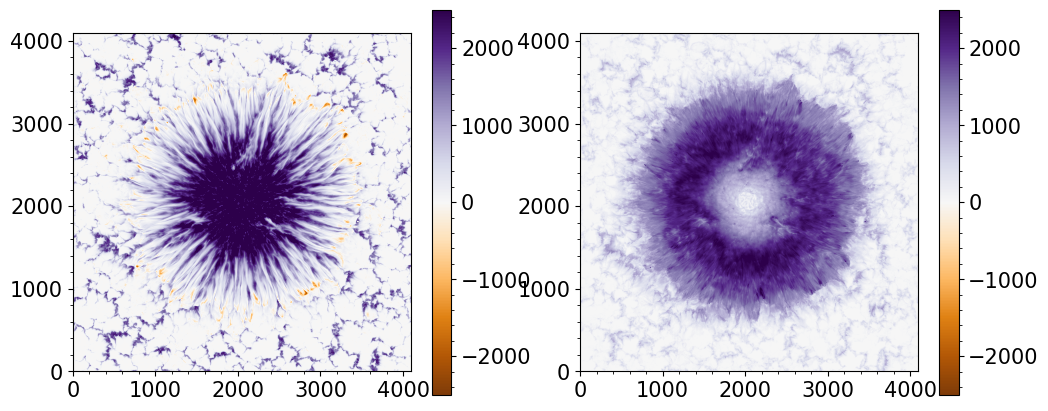

In [362]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(Bz7.T,origin='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()
plt.subplot(122)
plt.imshow(Bh7.T,origin='lower',cmap='PuOr',vmin=-2500,vmax=2500)
plt.colorbar()

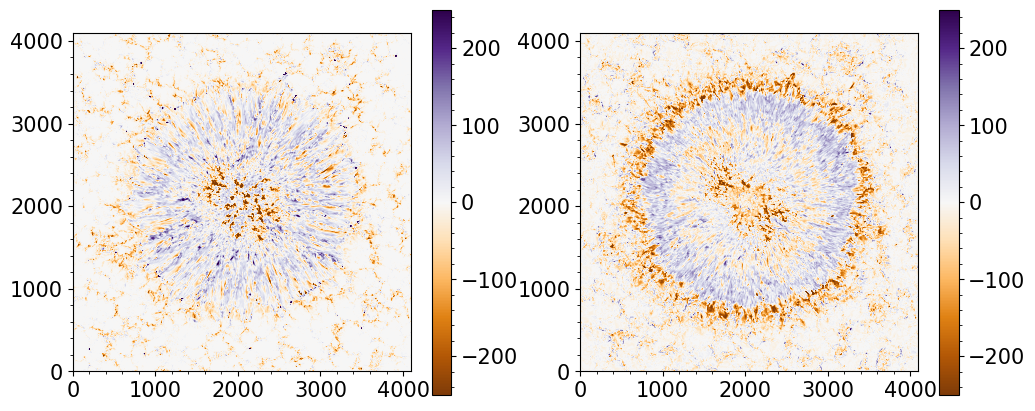

In [363]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(bz.T-Bz7.T,origin='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()
plt.subplot(122)
plt.imshow(bh.T-Bh7.T,origin='lower',cmap='PuOr',vmin=-250,vmax=250)
plt.colorbar()

# !

In [383]:
np.mean(models[:,:,0])

1018.2330354826946

In [384]:
np.mean(model7[:,:,0])

1026.6232800472194

In [400]:
np.mean(model8[:,:,0])

1024.9697474731402

### Here are the filters of HMI.

In [10]:
nb_filters = 6
wln_filters = np.loadtxt('wavelength.txt')
filters = np.zeros((nb_filters,len(wln_filters)))
for i in range(nb_filters):
  filters[i] = np.loadtxt('filter%i.txt' % i)
integral = np.trapz(filters[0], x=wln_filters)
filters = filters / integral

In [11]:
integral

0.04643951297986894

(6172.3, 6174.3)

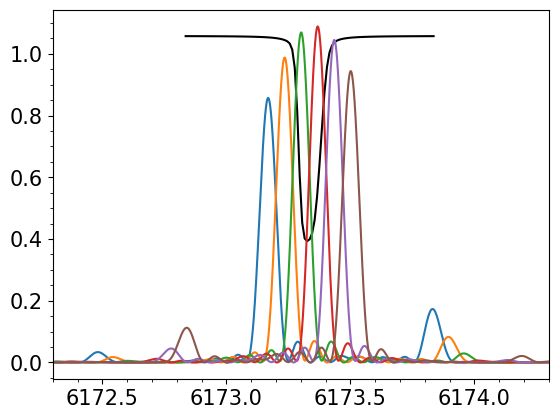

In [496]:
plt.plot(ll,stokes[100,10,0,:],color='black')
plt.plot(wln_filters+6173.33,filters[0]/10)
plt.plot(wln_filters+6173.33,filters[1]/10)
plt.plot(wln_filters+6173.33,filters[2]/10)
plt.plot(wln_filters+6173.33,filters[3]/10)
plt.plot(wln_filters+6173.33,filters[4]/10)
plt.plot(wln_filters+6173.33,filters[5]/10)
plt.xlim([6172.3,6174.3])

In [489]:
np.sum(filters[0])

1011.7176864376155

select the center region of filter0(blue one above)

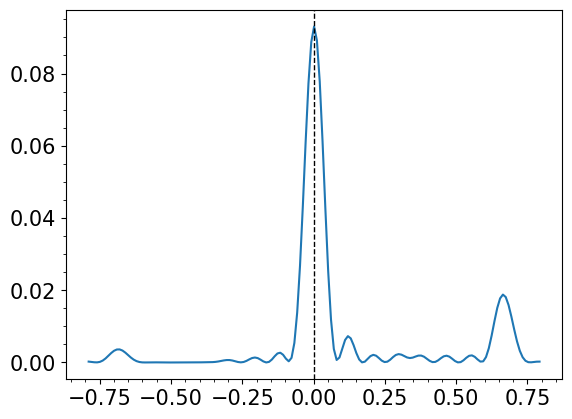

In [52]:
plt.plot(wln_filters[7036:8637:10]+0.164,filters[0,7036:8637:10]/np.sum(filters[0,7036:8637:10]))
plt.axvline(0,label=str(0),color='k',linewidth=1,linestyle="--")
#plt.xlim([-0.5,0.5])

select the central region of filter3(red one)

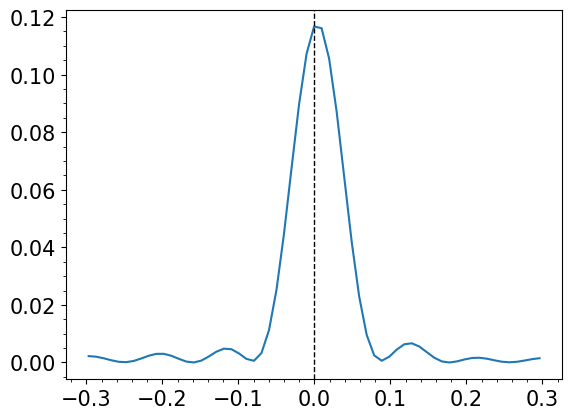

In [81]:
plt.plot(wln_filters[7734:8335:10]-0.034,filters[3,7734:8335:10]/np.sum(filters[3,7734:8335:10]))
plt.axvline(0,label=str(0),color='k',linewidth=1,linestyle="--")
#plt.xlim([-0.5,0.5])

In [535]:
np.sum(filters[3,7500:8500:10])

94.27977518708539

################################################################################

convolve with one filter.

In [ ]:
stokes_degraded_filter0 = np.zeros(stokes.shape)
for i in tqdm(range(stokes.shape[0])):
        for j in range(stokes.shape[1]):
            for k in range(stokes.shape[2]):
                stokes_degraded_filter0[i,j,k,:] = scipy.ndimage.convolve(stokes[i,j,k,:], filters[0,7036:8637:10]/np.sum(filters[0,7036:8637:10]), mode='nearest')
         

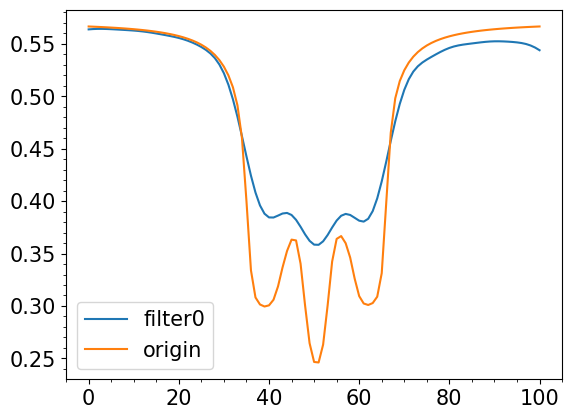

In [66]:
#plt.plot(stokes_degraded_filter3[1800,2100,0,:],label='filter3')
plt.plot(stokes_degraded_f0[1800,2100,0,:],label='filter0')
plt.plot(stokes[1800,2100,0,:],label='origin')
#plt.plot(stokes_degraded[1800,2100,0,:],label='gauss')
plt.legend()

In [531]:
hdu = fits.PrimaryHDU(stokes_degraded_filter3)
hdu.writeto('/dat-old/xenosh/Full_simulation/stokes_degraded_filter3.fits', overwrite=True)

In [532]:
del hdu

In [536]:
stokesd4 = np.zeros((4096,4096,4,6))
for i in tqdm(range(stokes_degraded.shape[0])):
        for j in range(stokes_degraded.shape[1]):
            for k in range(stokes_degraded.shape[2]):
                stokesd4[i,j,k,0] = np.sum(stokes_degraded_filter3[i,j,k,30:37])/7.0
                stokesd4[i,j,k,1] = np.sum(stokes_degraded_filter3[i,j,k,37:44])/7.0
                stokesd4[i,j,k,2] = np.sum(stokes_degraded_filter3[i,j,k,44:51])/7.0
                stokesd4[i,j,k,3] = np.sum(stokes_degraded_filter3[i,j,k,51:58])/7.0
                stokesd4[i,j,k,4] = np.sum(stokes_degraded_filter3[i,j,k,58:65])/7.0
                stokesd4[i,j,k,5] = np.sum(stokes_degraded_filter3[i,j,k,65:72])/7.0

100%|███████████████████████████████████████| 4096/4096 [24:10<00:00,  2.82it/s]


In [558]:
hdu = fits.PrimaryHDU(stokesd4)
hdu.writeto('/dat-old/xenosh/Full_simulation/stokesd_f3_avg.fits', overwrite=True)

In [551]:
Bzf = model_out[:,:,0]*np.cos(model_out[:,:,1])
Bhf = model_out[:,:,0]*np.sin(model_out[:,:,1])

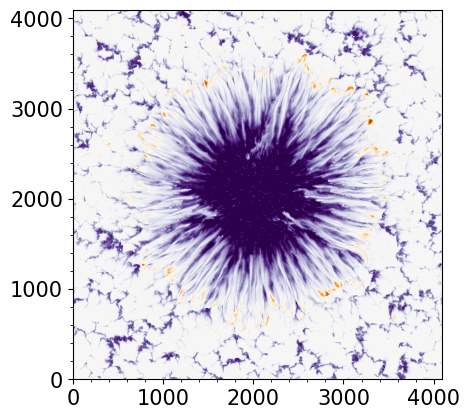

In [552]:
plt.imshow(Bzf.T,origin ='lower',cmap='PuOr',vmin=-2500,vmax=2500)

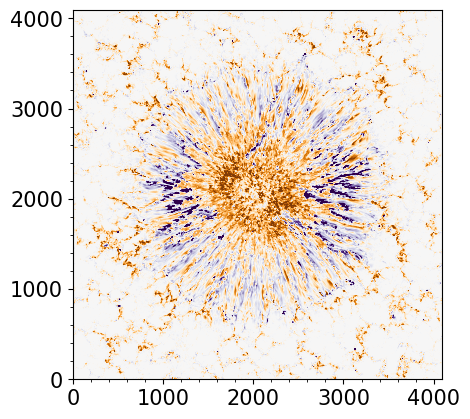

In [553]:
plt.imshow(bz.T-Bzf.T,origin ='lower',cmap='PuOr',vmin=-250,vmax=250)

In [554]:
print('<Bz>',np.mean(Bzf))
print('<|Bz|>',np.mean(np.abs(Bzf)))

<Bz> 556.9683028904684
<|Bz|> 582.1708572857299


In [556]:
(582-570)/570

0.021052631578947368

In [557]:
Bzf[Bzf>6000].size

307

In [54]:
modelf=fits.open('/dat-old/xenosh/Full_simulation/stokesd_f0_inverted_ex10.fits')[0].data
synf=fits.open('/dat-old/xenosh/Full_simulation/stokesd_f0_inverted_ex10.fits')[1].data

In [55]:
Bzf0 = modelf[:,:,0]*np.cos(modelf[:,:,1])
Bhf0 = modelf[:,:,0]*np.sin(modelf[:,:,1])

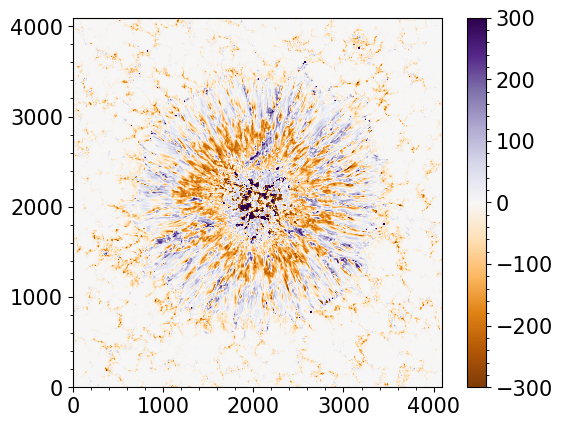

In [72]:
plt.imshow(bz.T-Bzf0.T,origin ='lower',cmap='PuOr',vmin=-300,vmax=300)
plt.colorbar()

In [61]:
print('<Bz>',np.mean(Bzf0))
print('<|Bz|>',np.mean(np.abs(Bzf0)))

<Bz> 557.3845259005045
<|Bz|> 589.8315078800474


In [67]:
(557-548)/548

0.016423357664233577

In [82]:
(590-570)/570

0.03508771929824561